In [1]:
from csv_analysis import BayesDB_Simulator, pred_wrapper, add_bouts_reversed_label, make_regression_plots
%matplotlib inline
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import norm, beta, gamma, erlang, alpha, exponnorm
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})



In [2]:
fish_id = "wik_bdb"
file_id = "bdb_hunts_inverted.bdb"
file_id_raw = "bdb_hunts.bdb"
file_id_allnans = "bdb_hunts_rev_w_nans.bdb"
bdsim = BayesDB_Simulator(fish_id, file_id, -1)
data = pd.read_csv('wik_bdb/huntbouts_inverted.csv')
data_raw = pd.read_csv('wik_bdb/all_huntbouts_rev.csv')
bdsim_raw = BayesDB_Simulator(fish_id, file_id_raw, -1)
bdsim_allnans = BayesDB_Simulator(fish_id, file_id_allnans, -1)



### USE FOR AZ QUERIES

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
87 bouts in Query 1
Mean Q1 = 43.34006868
49 bouts in Query 2
Mean Q2 = 25.5435279011
Ttest_indResult(statistic=3.0476456158076504, pvalue=0.0027790655230678259)


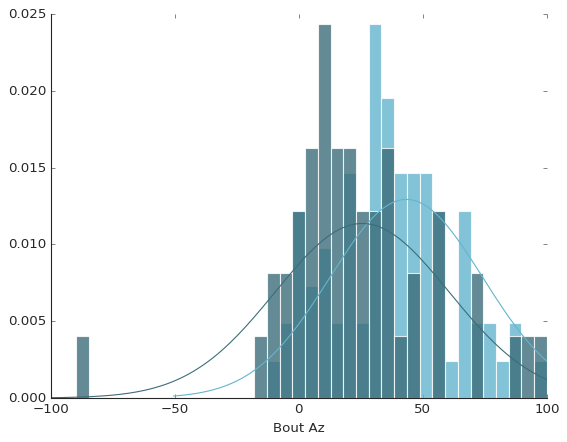

In [3]:
color = cp[9]
varb = '"Bout Delta Yaw"'
lims = [-100, 100, 5]
raw_q = bdsim_raw.compare_2_queries('"Bout Az"', 
    '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    1, 0, color, lims, 1)

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
187 bouts in Query 1
Mean Q1 = -13.2366619178
120 bouts in Query 2
Mean Q2 = 1.14525125382
Ttest_indResult(statistic=-4.6039132710977233, pvalue=6.0936177781282021e-06)


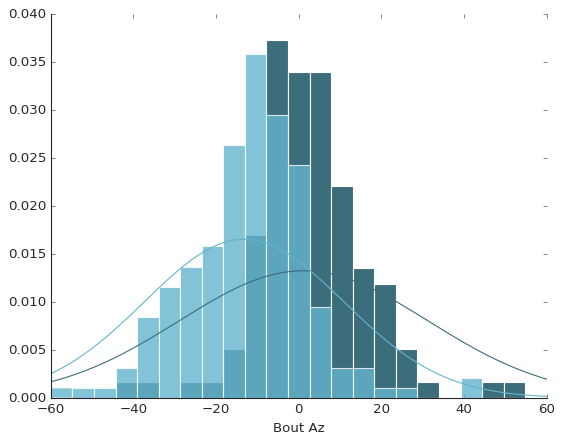

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
126 bouts in Query 1
Mean Q1 = -17.6855574906
71 bouts in Query 2
Mean Q2 = -4.78667708195
Ttest_indResult(statistic=-3.0712826085812237, pvalue=0.0024357578783335446)


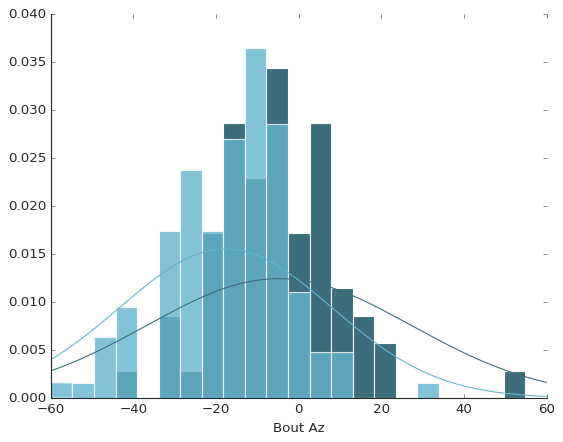

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
84 bouts in Query 1
Mean Q1 = -25.93890233
48 bouts in Query 2
Mean Q2 = -10.8196498307
Ttest_indResult(statistic=-3.1343401461595213, pvalue=0.0021294658884756733)


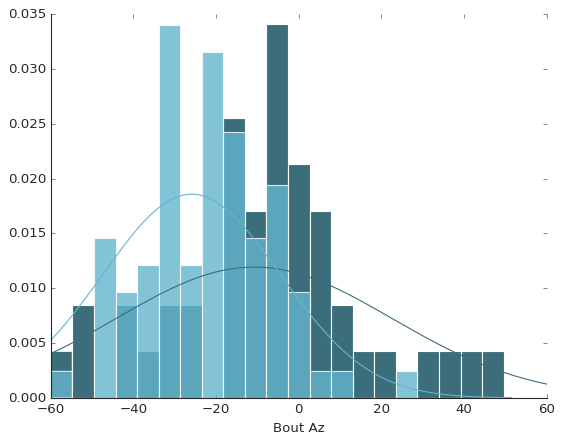

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
60 bouts in Query 1
Mean Q1 = -41.370522293
14 bouts in Query 2
Mean Q2 = -19.5355286547
Ttest_indResult(statistic=-2.2425095577912102, pvalue=0.028008380427791139)


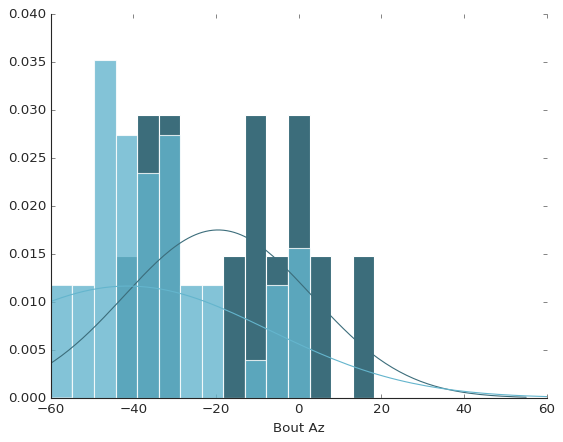

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
29 bouts in Query 1
Mean Q1 = -41.9018443946
10 bouts in Query 2
Mean Q2 = -18.2154520092
Ttest_indResult(statistic=-1.6099368071188669, pvalue=0.11591162429306343)


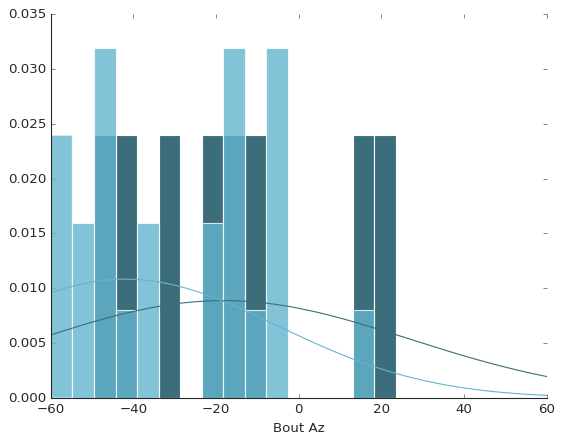

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
25 bouts in Query 1
Mean Q1 = -37.8871350677
12 bouts in Query 2
Mean Q2 = -24.6902247484
Ttest_indResult(statistic=-0.7975906791254449, pvalue=0.43048625963147114)


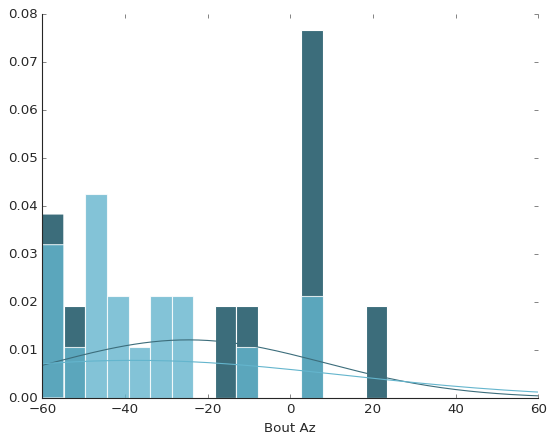

SELECT "Bout Az" FROM bout_table WHERE "Para Az" < -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" < -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
37 bouts in Query 1
Mean Q1 = -70.9471693055
23 bouts in Query 2
Mean Q2 = -58.9066546837
Ttest_indResult(statistic=-1.0917557034970269, pvalue=0.27945493443407654)


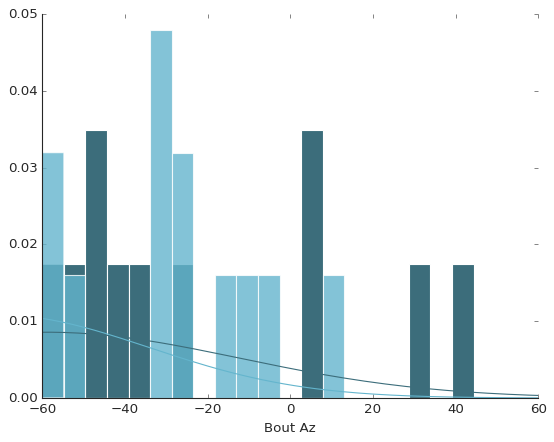

In [4]:
color = cp[9]
lims = [-60, 60, 5]
varb = '"Bout Az"'
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Az"', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     1, 0, color)

naz0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

pl.savefig('Az_2q.pdf')

naz1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

naz6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" < -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" < -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

# THERE ARENT ENOUGH BOUTS IN 7 OR 8 TO PLOT. 6 HAS 24 BOUTS. TO BE SYMMETRIC WITH POS, USE LESS THAN -.524. 

# az6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.611 AND -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Az" BETWEEN -.611 AND -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# az7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.698 AND -.611 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Az" BETWEEN -.698 AND -.611 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# az8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.785 AND -.698 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Az" BETWEEN -.785 AND -.698 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)




SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
174 bouts in Query 1
Mean Q1 = 2.74944218812
141 bouts in Query 2
Mean Q2 = -1.17163703713
Ttest_indResult(statistic=8.4205198530636576, pvalue=1.3688255569638501e-15)


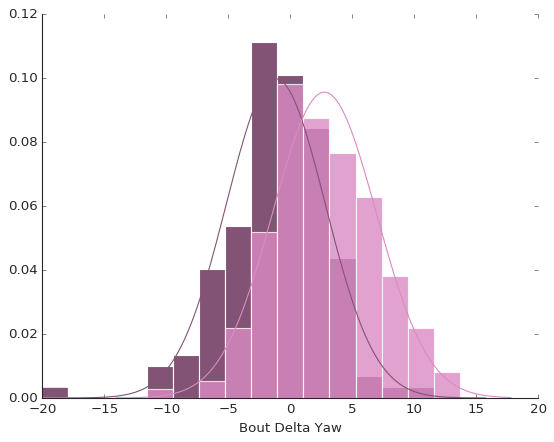

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
139 bouts in Query 1
Mean Q1 = 5.93672021068
116 bouts in Query 2
Mean Q2 = 1.65668073713
Ttest_indResult(statistic=6.4811305126948318, pvalue=4.7295225941360612e-10)


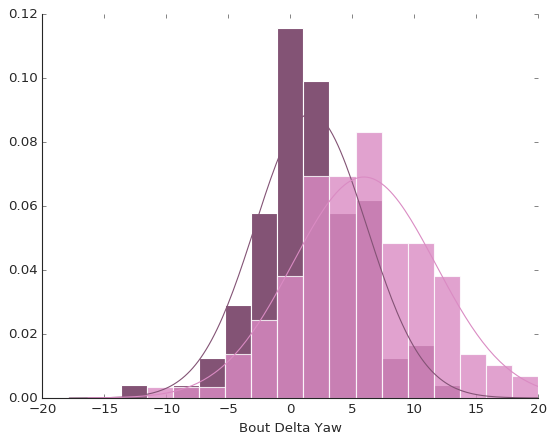

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
90 bouts in Query 1
Mean Q1 = 6.83614962986
36 bouts in Query 2
Mean Q2 = 1.53462475299
Ttest_indResult(statistic=4.4147265032646272, pvalue=2.1746602927454695e-05)


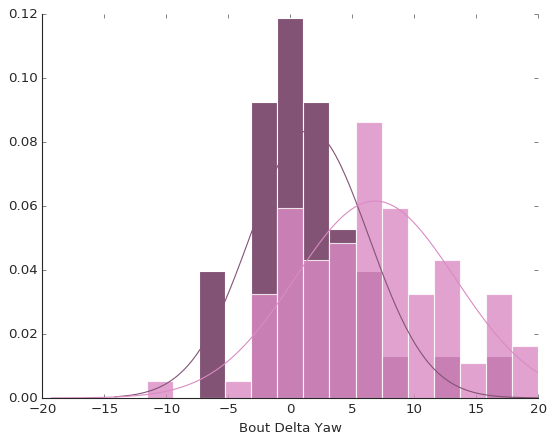

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
59 bouts in Query 1
Mean Q1 = 9.78682730696
29 bouts in Query 2
Mean Q2 = 5.37411650393
Ttest_indResult(statistic=3.1765647611474748, pvalue=0.0020700378596793028)


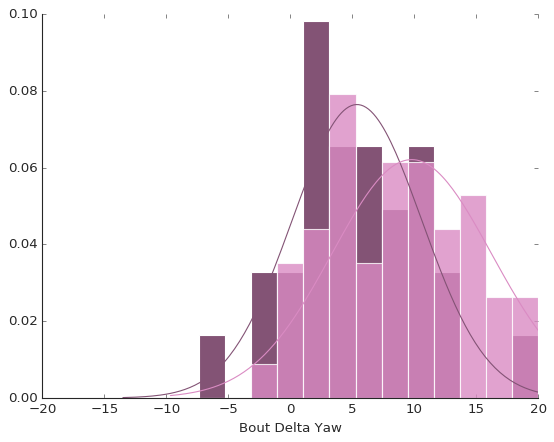

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
28 bouts in Query 1
Mean Q1 = 10.2747398608
14 bouts in Query 2
Mean Q2 = 6.53342986789
Ttest_indResult(statistic=1.3885942684167307, pvalue=0.17264059612046773)


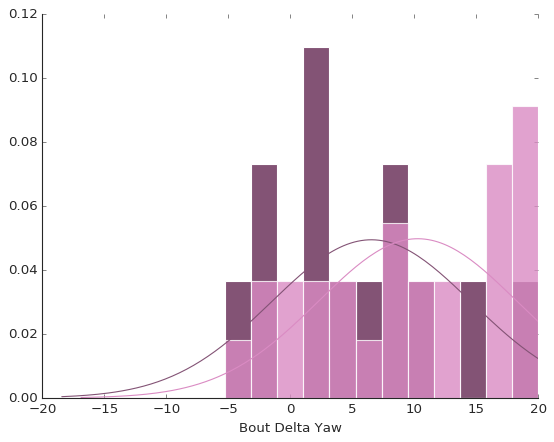

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
20 bouts in Query 1
Mean Q1 = 15.6674025854
18 bouts in Query 2
Mean Q2 = 6.61970096799
Ttest_indResult(statistic=4.2280317210115115, pvalue=0.0001541569831560468)


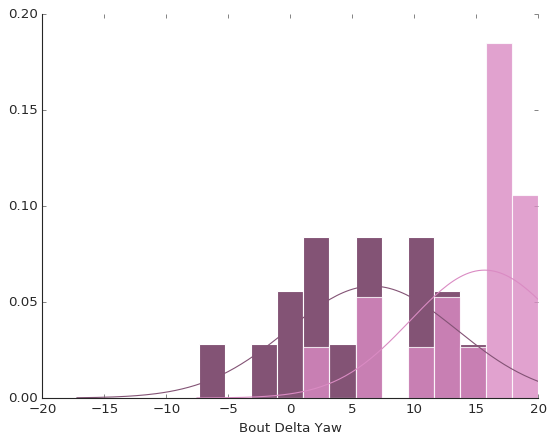

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" > .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" > .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
44 bouts in Query 1
Mean Q1 = 19.3906048829
27 bouts in Query 2
Mean Q2 = 12.3692833747
Ttest_indResult(statistic=2.0030484676614573, pvalue=0.049102009134543954)


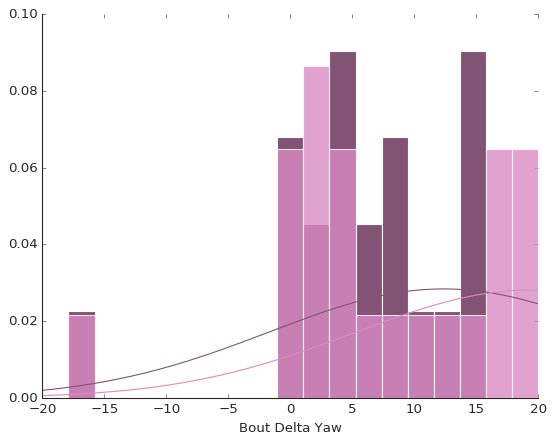

In [5]:
color = cp[6]
varb = '"Bout Delta Yaw"'
lims = [np.nan, np.nan]
lims = [-20, 20, 2]
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Az"', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     1, 0, color)


az0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)

az0[0].savefig('az_2q.pdf')

az1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)
az2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)
az3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)
az4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)
az5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)

az6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" > .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" > .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims,1)

# NOTE THAT THE QUERIES BELOW ALL RETURN LESS THAN 20 BOUTS TOTAL. THEREFORE COMBINED ALL ABOVE .524 (30 degrees)

# az6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .524 AND .611 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Az" BETWEEN .524 AND .611 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims,1)
# az7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .611 AND .698 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Az" BETWEEN .611 AND .698 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims,1)
# az8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .698 AND .785 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Az" BETWEEN .698 AND .785 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims,1)




In [29]:
# fig = sb.barplot(data=[naz6[1], naz6[2], naz5[1], naz5[2], naz4[1], naz4[2], naz3[1], naz3[2], 
#                        naz2[1], naz2[2], naz1[1], naz1[2], naz0[1], naz0[2], 
#                        az0[2], az0[1], az1[2], az1[1], az2[2], az2[1], az3[2], az3[1],
#                        az4[2], az4[1], az5[2], az5[1], az6[2], az6[1]], ci=95, color='b')
# pl.show()

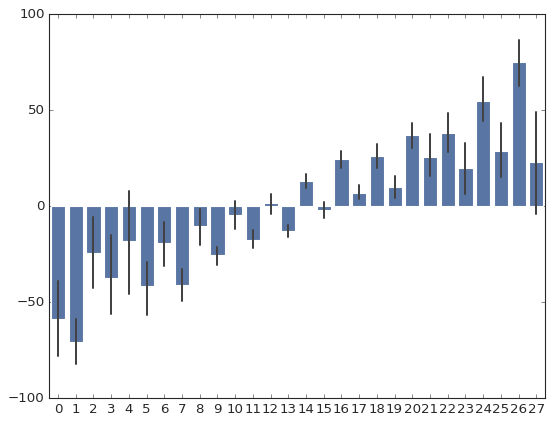

In [30]:
# NEG OR POS

# fig = sb.barplot(data=[az0[1], az0[2], az1[1], az1[2], az2[1], az2[2], az3[1], az3[2],
#                  az4[1], az4[2], az5[1], az5[2], az6[1], az6[2]], ci=95, color='b')

# BOTH

fig = sb.barplot(data=[naz6[2], naz6[1], naz5[2], naz5[1], naz4[2], naz4[1], naz3[2], naz3[1], 
                       naz2[2], naz2[1], naz1[2], naz1[1], naz0[2], naz0[1], 
                       az0[1], az0[2], az1[1], az1[2], az2[1], az2[2], az3[1], az3[2],
                       az4[1], az4[2], az5[1], az5[2], az6[1], az6[2]], ci=95, color='b')



pl.savefig('bars.pdf')
pl.show()

### USE FOR ALT QUERIES

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
30 bouts in Query 1
Mean Q1 = -2.24289417915
22 bouts in Query 2
Mean Q2 = -4.55576723105
Ttest_indResult(statistic=1.1894246891231002, pvalue=0.23989035525822777)


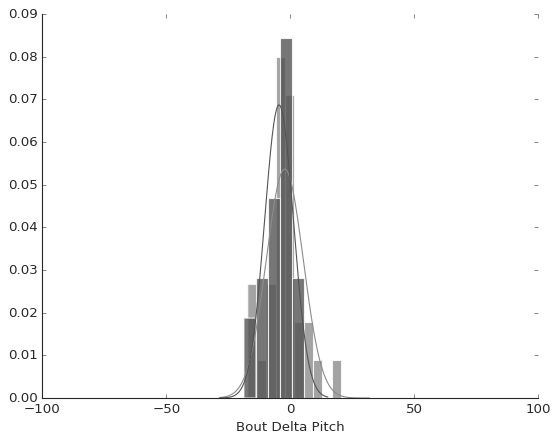

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" < -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" < -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
53 bouts in Query 1
Mean Q1 = -3.06809022041
32 bouts in Query 2
Mean Q2 = -5.73222016229
Ttest_indResult(statistic=1.186150726771674, pvalue=0.23894718589793479)


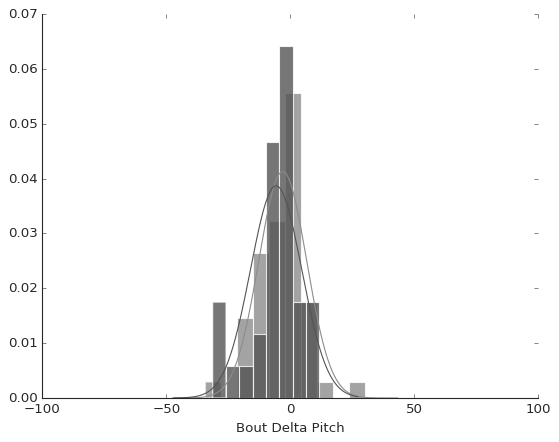

In [35]:
color = cp[7]
varb = '"Bout Delta Pitch"'
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Alt"', 
#     '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     1, 0, color)

nalt0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

pl.savefig('Alt_2q.pdf')


nalt1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" < -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" < -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)




# alt1 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.175 AND -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.175 AND -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)



# alt2 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.261 AND -.175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.261 AND -.175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# alt3 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.349 AND -.261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.349 AND -.261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# alt4 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.436 AND -.349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.436 AND -.349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# alt5 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.524 AND -.436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.524 AND -.436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# alt6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.611 AND -.524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.611 AND -.524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# alt7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.698 AND -.611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.698 AND -.611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)
# alt8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN -.785 AND -.698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN -.785 AND -.698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)


# 0 is only one with at least 10 bouts in both conditions. pool the rest. 



SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
24 bouts in Query 1
Mean Q1 = -1.12904995925
46 bouts in Query 2
Mean Q2 = -2.42038759185
Ttest_indResult(statistic=0.93006552177298585, pvalue=0.35562725478882129)


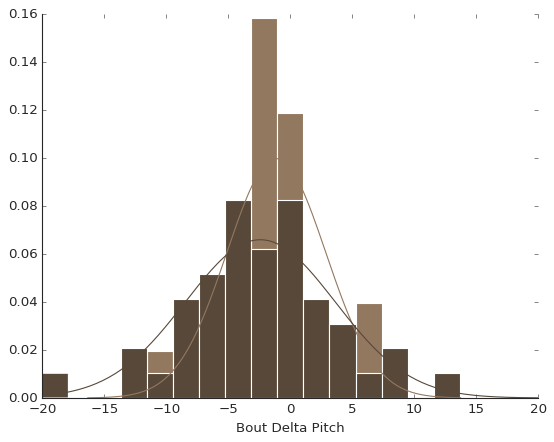

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
61 bouts in Query 1
Mean Q1 = 0.915833903438
100 bouts in Query 2
Mean Q2 = -1.06786026755
Ttest_indResult(statistic=2.3975233708423063, pvalue=0.017665926438483765)


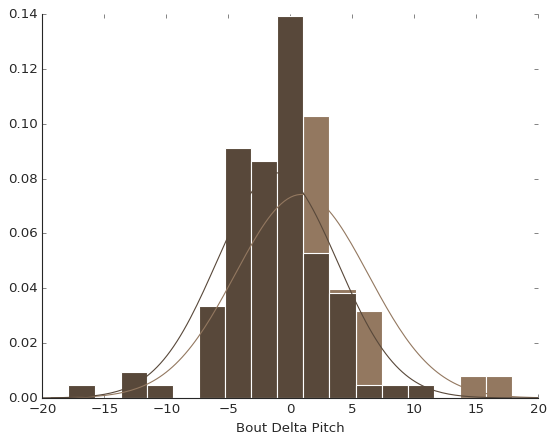

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
73 bouts in Query 1
Mean Q1 = 1.86317826175
135 bouts in Query 2
Mean Q2 = 0.726049222643
Ttest_indResult(statistic=1.1762044189438987, pvalue=0.24087064324205745)


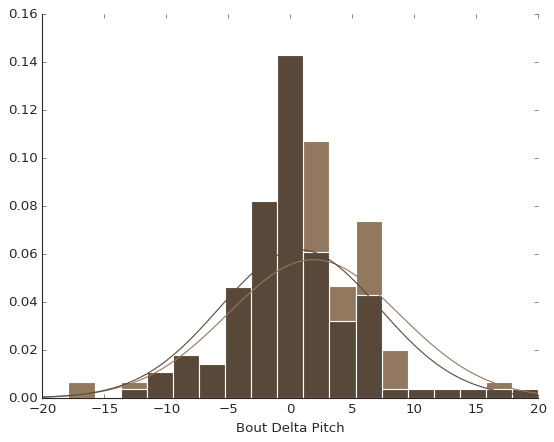

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
116 bouts in Query 1
Mean Q1 = 3.16058528177
187 bouts in Query 2
Mean Q2 = 1.47841007435
Ttest_indResult(statistic=2.8849660711017284, pvalue=0.0041972650266070321)


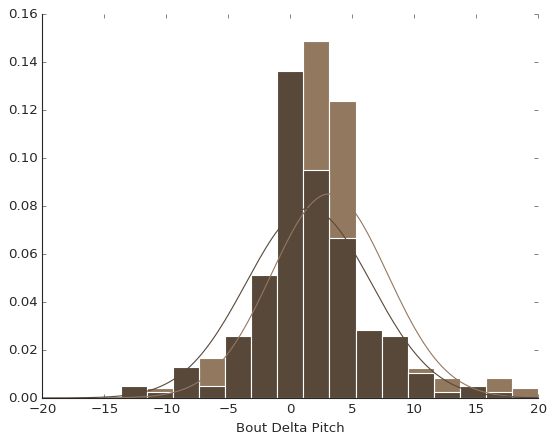

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
124 bouts in Query 1
Mean Q1 = 3.92502106615
185 bouts in Query 2
Mean Q2 = 2.10727820854
Ttest_indResult(statistic=3.62461776954326, pvalue=0.00033862631025692569)


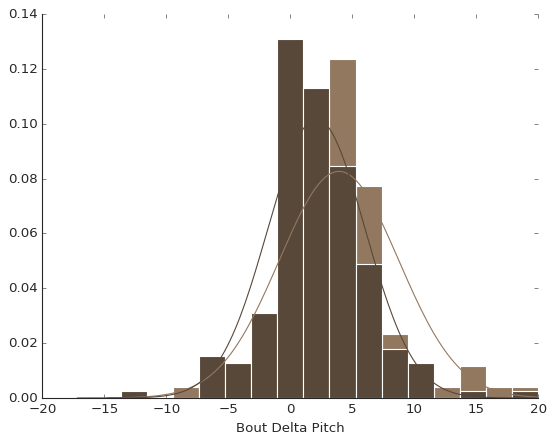

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
126 bouts in Query 1
Mean Q1 = 4.86276251623
150 bouts in Query 2
Mean Q2 = 3.62216550876
Ttest_indResult(statistic=2.0717856807137438, pvalue=0.039221033542771414)


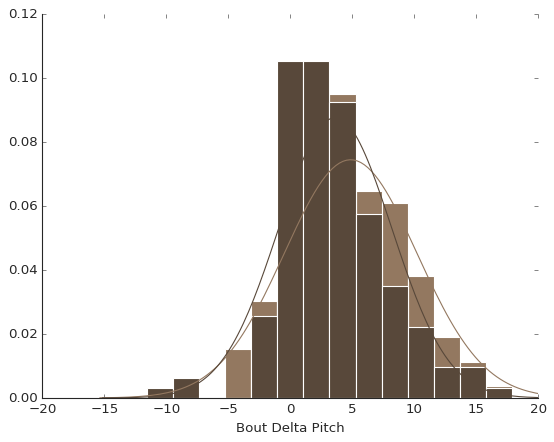

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
73 bouts in Query 1
Mean Q1 = 7.51790018758
67 bouts in Query 2
Mean Q2 = 5.17320374056
Ttest_indResult(statistic=2.8119706869565064, pvalue=0.005641896247640818)


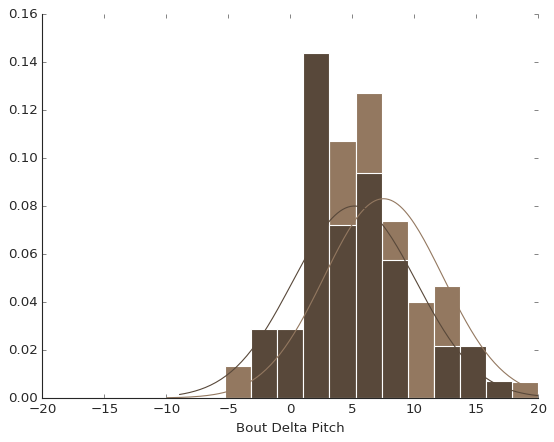

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
59 bouts in Query 1
Mean Q1 = 8.33586652868
40 bouts in Query 2
Mean Q2 = 5.53108943712
Ttest_indResult(statistic=1.980719984043553, pvalue=0.050454779467337341)


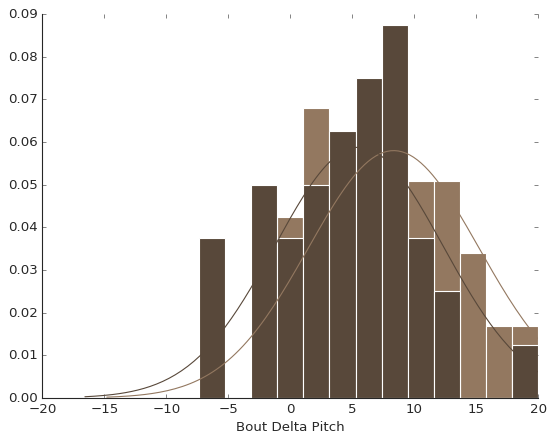

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
22 bouts in Query 1
Mean Q1 = 11.2844064185
13 bouts in Query 2
Mean Q2 = 9.076544672
Ttest_indResult(statistic=0.90437571565779407, pvalue=0.37235147213281272)


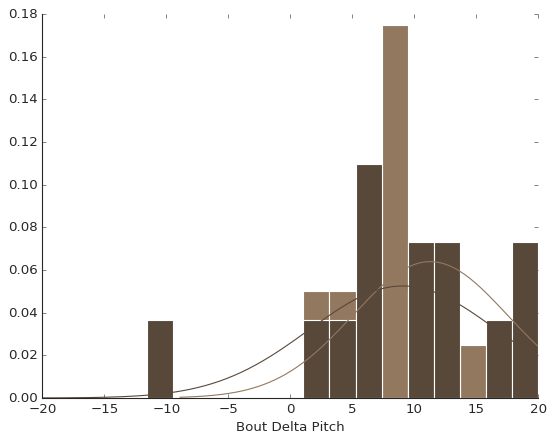

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" > .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" > .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
18 bouts in Query 1
Mean Q1 = 14.4585973767
25 bouts in Query 2
Mean Q2 = 5.45124595667
Ttest_indResult(statistic=3.1858397119377573, pvalue=0.0027586514436913948)


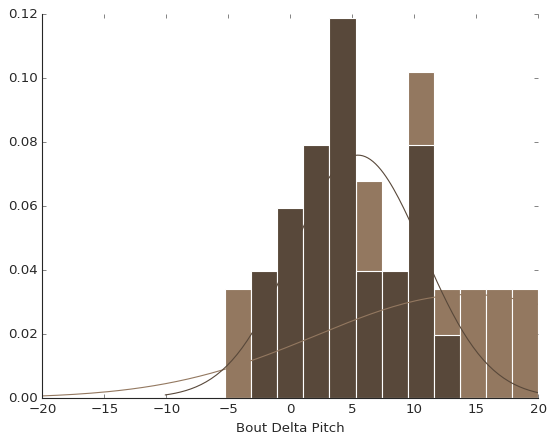

In [8]:
color = cp[5]
varb = '"Bout Delta Pitch"'
lims = [-20, 20, 2]

alt0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

alt1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
alt2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
alt3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
alt4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

alt3[0].savefig('Alt_2q_15to20.pdf')
alt4[0].savefig('Alt_2q_20to25.pdf')


alt5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
         1, 0, color, lims, 1)
alt6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
alt7 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
alt8 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

alt9 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" > .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Alt" > .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

# alt9 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN .785 AND .872 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN .785 AND .872 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)

# alt10 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" > .872 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" > .872 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)


# Alt 10 is the first to not have 10 of each. pooled above .872, but also less than 10. Pool at 9. 

# alt10 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Alt" BETWEEN .872 AND .957 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Alt" BETWEEN .872 AND .957 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims, 1)




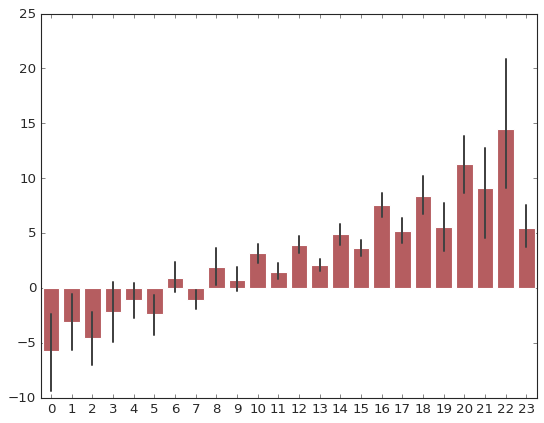

In [37]:
# POSITIVE

# sb.barplot(data=[alt0[1], alt0[2], alt1[1], alt1[2], alt2[1], alt2[2], alt3[1], alt3[2],
#                  alt4[1], alt4[2], alt5[1], alt5[2], alt6[1], alt6[2], alt7[1], alt7[2],
#                  alt8[1], alt8[2], alt9[1], alt9[2]], ci=95, color='r')


# NEGATIVE 

# sb.barplot(data=[alt0[1], alt0[2], alt1[1], alt1[2]], color='r', ci=95)


# BOTH

sb.barplot(data=[nalt1[2], nalt1[1], nalt0[2], nalt0[1], alt0[1], alt0[2], alt1[1], alt1[2], alt2[1], alt2[2], alt3[1], alt3[2],
                 alt4[1], alt4[2], alt5[1], alt5[2], alt6[1], alt6[2], alt7[1], alt7[2],
                 alt8[1], alt8[2], alt9[1], alt9[2]], ci=95, color='r')

pl.savefig('bars.pdf')

pl.show()

### USE FOR DESCRIBING PARA POSITION CONTROLS

SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
147 bouts in Query 1
Mean Q1 = 0.0451954299592
168 bouts in Query 2
Mean Q2 = 0.0430236095952
Ttest_indResult(statistic=0.7737252825455373, pvalue=0.43967724308726863)


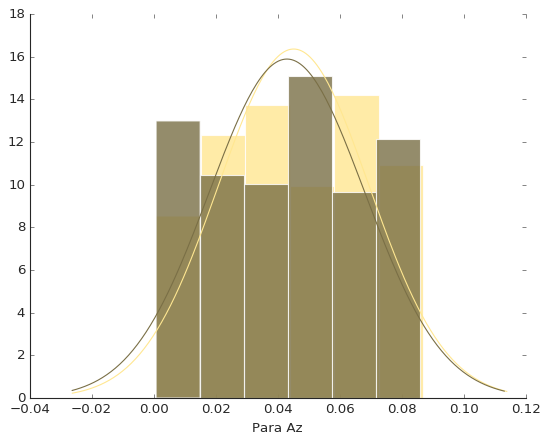

In [97]:
color = cp[8]
two_p = bdsim_raw.compare_2_queries('"Para Az"', 
    '"Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    '"Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
    1, 0, color)

### OVERLAPPING TWO VARIABLE REGRESSIONS

In [ ]:
labels = ("Para Dist", "Bout Dist")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0 AND "Para Alt Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .3 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2')
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 AND .3 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" < 0')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))', husl[3], labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az" > 0 AND "Para Az Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az" < 0 AND "Para Az Velocity" < 0')
#rp = bdsim.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" > 0')
#rp2 = bdsim.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" < 0')
rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3', husl[3], labels)
rp[0].savefig('regplot.pdf')
#rp2[0].savefig('regplot2.pdf')
pl.show()
#mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, [husl[3], husl[0]])
#mrp.savefig('mrp_az.pdf')

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" < 0 AND "Strike Or Abort" < 3
798 Bouts
Unexplained Variance  0.0429559597446
SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > 0 AND "Strike Or Abort" < 3
894 Bouts
Unexplained Variance  0.0350048353543


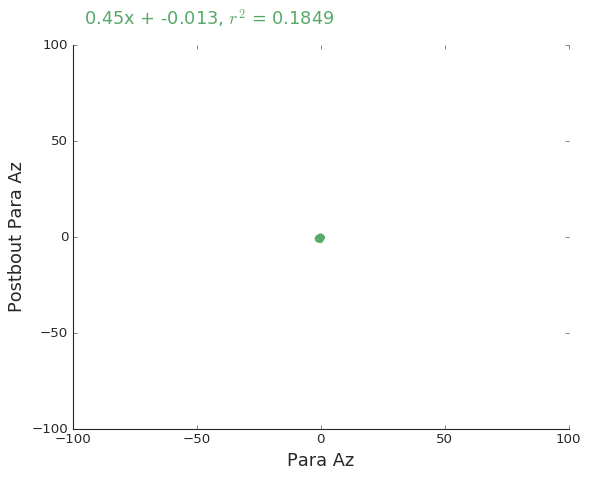

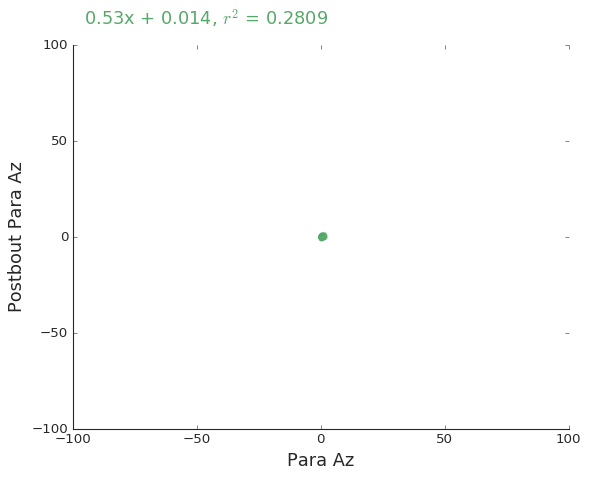

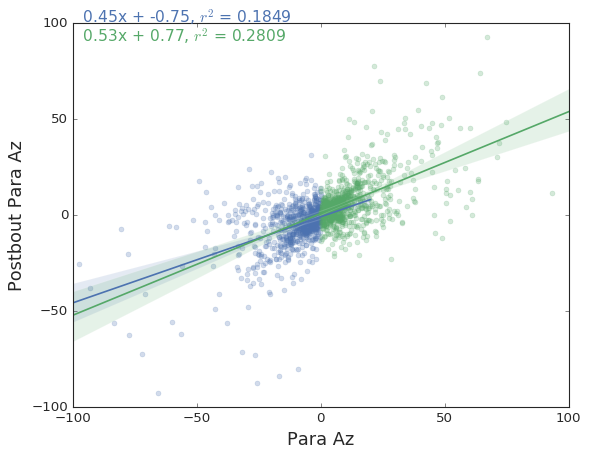

In [34]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
colors = [np.array(cp[0]) * .7, np.array(cp[0]) * 1.4]
colors = [cp[0], cp[2]]



#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100], [-100, 100]]
#rp = bdsim.two_variable_regression(query_exp, '"Para Alt" BETWEEN 0 and .3 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2')
#rp = bdsim.two_variable_regression(query_exp, '"Para Alt" BETWEEN 0 AND .3 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" < 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" > 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" > 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" < 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" > 0))')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" > 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" > 0 AND "Para Alt Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0 AND "Para Alt Velocity" < 0')


# USE THESE FOR ALT

# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -3  AND "Strike Or Abort" == 3', 
#     colors[1], labels)


# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -3 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[1], labels)

# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     colors[1], labels, lims)


# # # rp2 = bdsim_raw.two_variable_regression(
# # #     query_exp,
# # #     '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
# # #     colors[1], labels, lims)

# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     colors[1], labels, lims)


# USE THESE FOR AZ AND DIST



rp = bdsim_raw.two_variable_regression(
        query_exp,
        '"Bout Number" > 0 AND "Para Az" < 0 AND "Strike Or Abort" < 3', 
        colors[1], labels, lims)

rp2 = bdsim_raw.two_variable_regression(
        query_exp,
        '"Bout Number" > 0 AND "Para Az" > 0 AND "Strike Or Abort" < 3', 
        colors[1], labels, lims)

# rp = bdsim_raw.two_variable_regression(
#         query_exp,
#         '"Bout Number" > 0 AND "Para Az Velocity" > 0 AND "Strike Or Abort" < 3', 
#         colors[1], labels, lims, 1)

# rp2 = bdsim_raw.two_variable_regression(
#         query_exp,
#         '"Bout Number" > 0 AND "Para Az Velocity" < 0 AND "Strike Or Abort" < 3', 
#         colors[1], labels, lims, 1)
    
# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Bout Number" > 0 AND "Rev Bout Number" > -4 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[1], labels)

# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Bout Number" > 0 AND "Rev Bout Number" <= -4 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[1], labels)



#rp2 = bdsim_raw.two_variable_regression(query_exp,'"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', colors[1], labels)



#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" > 0', colors[0], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0', colors[1], labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" > 0', colors[0], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0', colors[1], labels)
rp[0].savefig('regplot.pdf')
rp2[0].savefig('regplot2.pdf')
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims, 1)
mrp.savefig('mrp.pdf')

### REGRESSION FOR RAW DATA

SELECT "Para Alt","Bout Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
1647 Bouts
Unexplained Variance  0.208698904248
SELECT "Para Alt","Bout Alt" FROM bout_table WHERE "Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
137 Bouts
Unexplained Variance  0.234310842753


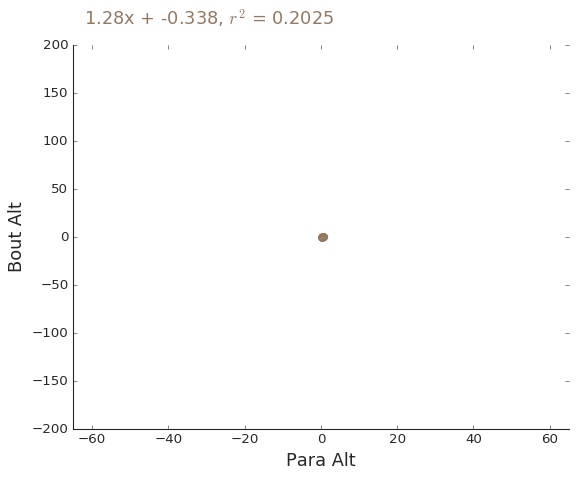

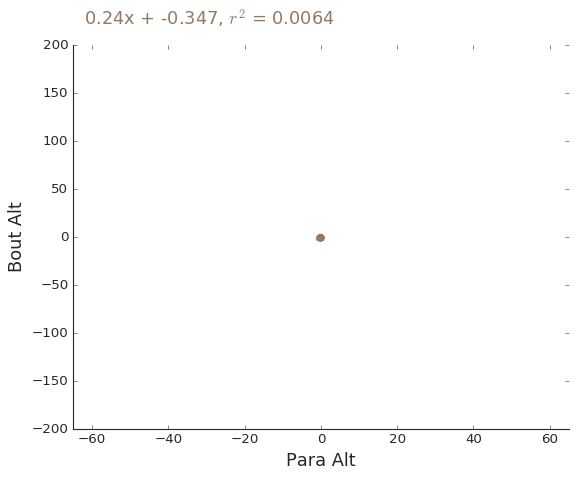

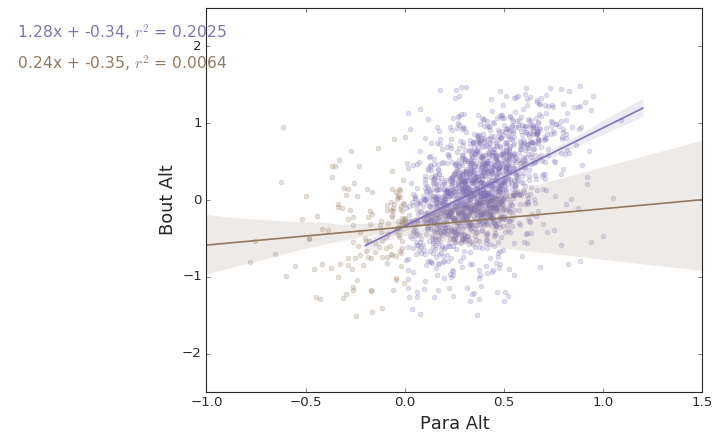

In [95]:
labels = ("Para Alt", "Bout Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
color = cp[5]
colors = [cp[4], cp[5]]
lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-65, 65],[-200, 200]]
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .1')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Rev Bout Number" < -5 AND "Strike Or Abort" == 3', color, labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '')
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors)
rp[0].savefig('regplot.pdf')
pl.show()

### SINGLE VARIABLE HISTOGRAMS FOR DISTRIBUTION OF POSTBOUT PARA POSITION

SELECT "Postbout Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .005 AND "Para Az" < .006 AND "Strike Or Abort" < 3
3 total bouts
-0.00598022933333
0.0612197030846
17.1887338539
18.3346494442


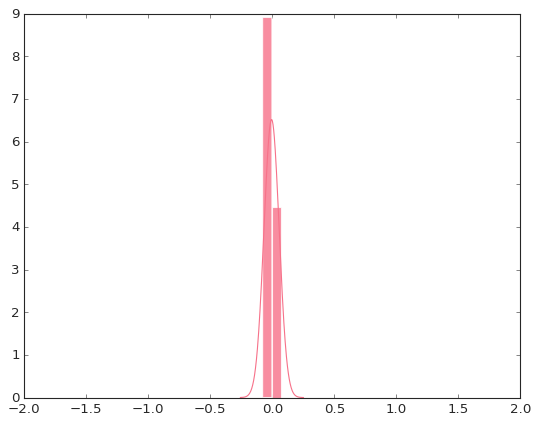

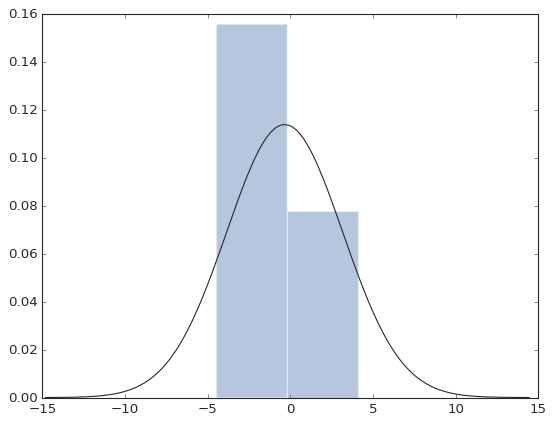

In [21]:
p1, d1 = bdsim_raw.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .005 AND "Para Az" < .006 AND "Strike Or Abort" < 3', husl[0])
pl.figure()
sb.distplot(np.degrees(d1), fit=norm, kde=False)
print np.degrees(.3)
print np.degrees(.32)
pl.show()



### SINGLE VARIABLE HISTOGRAMS

SELECT "Bout Number" FROM bout_table WHERE "Rev Bout Number" == -2  AND "Strike Or Abort" < 3
444 total bouts
4.12162162162
2.94905406747
SELECT "Bout Number" FROM bout_table WHERE "Rev Bout Number" == -2  AND "Strike Or Abort" == 3
522 total bouts
2.68199233716
2.81389911235
5.0
4.0
Counter({4.0: 94, 5.0: 92, 6.0: 66, 7.0: 48, 8.0: 33, 3.0: 28, 9.0: 18, 2.0: 17, 10.0: 11, 11.0: 10, 12.0: 8, 13.0: 6, 14.0: 4, 15.0: 4, 16.0: 2, 17.0: 1, 21.0: 1, 26.0: 1})
Counter({3.0: 122, 2.0: 98, 4.0: 89, 5.0: 73, 6.0: 49, 8.0: 28, 7.0: 15, 9.0: 15, 10.0: 11, 11.0: 7, 12.0: 6, 13.0: 6, 19.0: 2, 28.0: 1})


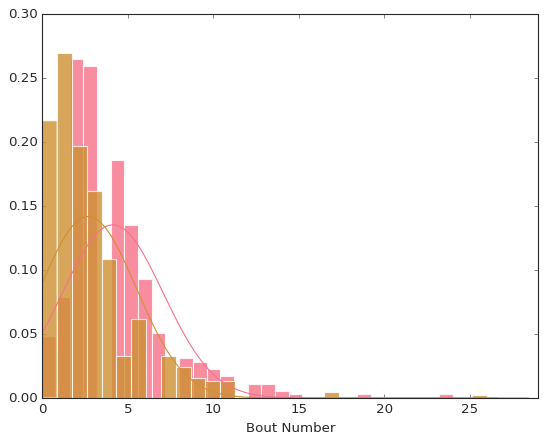

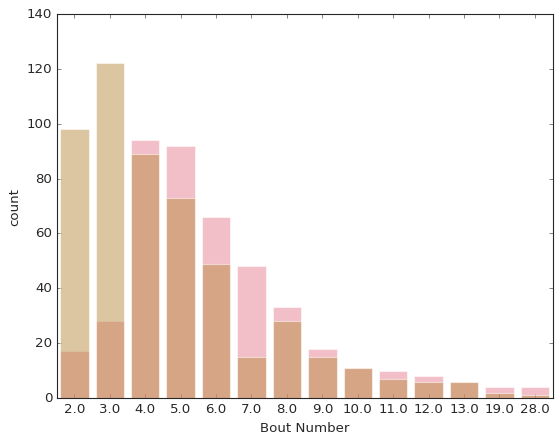

In [11]:
#p1, d1 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" <= -1  AND "Strike Or Abort" == 2', husl[0])
#p2, d2 = bdsim_raw.single_hist('"Bout Dist"', '"Bout Number" > 0  AND "Strike Or Abort" <= 2', husl[0], [50,[0,1000]])
#p3, d3 = bdsim_raw.single_hist('"Para Az"', '"Rev Bout Number" == -2  AND "Strike Or Abort" < 3', husl[0])
#p3, d3 = bdsim_raw.single_hist('"Para Az"', '"Rev Bout Number" == -2  AND "Strike Or Abort" == 3', husl[1])
#fit = beta.fit(d2, floc=0)

p1, d1 = bdsim_allnans.single_hist('"Bout Number"', '"Rev Bout Number" == -2  AND "Strike Or Abort" < 3', husl[0], [30, [0,29]])
p2, d2 = bdsim_allnans.single_hist('"Bout Number"', '"Rev Bout Number" == -2  AND "Strike Or Abort" == 3', husl[1], [30, [0,29]])
#fit = beta.fit(d2, floc=0)
#fit = exponnorm.fit(d2, floc=.3)
#print fit
#pl.plot(np.linspace(-2,2,100), [beta.pdf(x, fit[0], fit[1], scale=fit[3]) for x in np.linspace(-2,2,100)])
#pl.plot(np.linspace(-2,2,100), [exponnorm.pdf(x, fit[0], fit[1], scale=fit[2]) for x in np.linspace(-2,2,100)])
#normfit = norm.fit(d2)
#print normfit


pl.figure()

sb.countplot(d1 + 2, color=husl[0], alpha=0.5)
print np.median(d1+2)
sb.countplot(d2 + 2, color=husl[1], alpha=0.5)
print np.median(d2+2)
print Counter(d1 + 2)
print Counter(d2 + 2)

pl.show()

### USE FOR DESCRIBING PARA SPECIFIC FEATURES

0.158394285714
SELECT "Avg Para Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
3.41919081896
1.78765052075


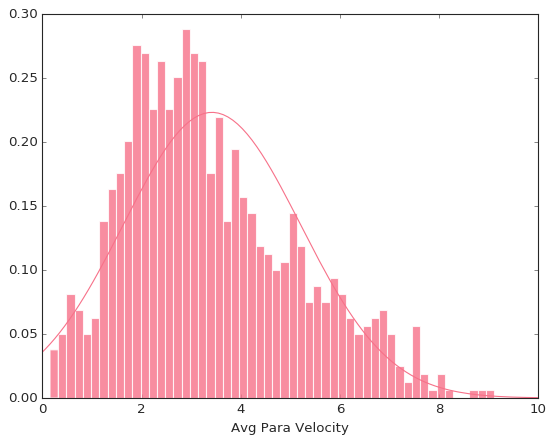

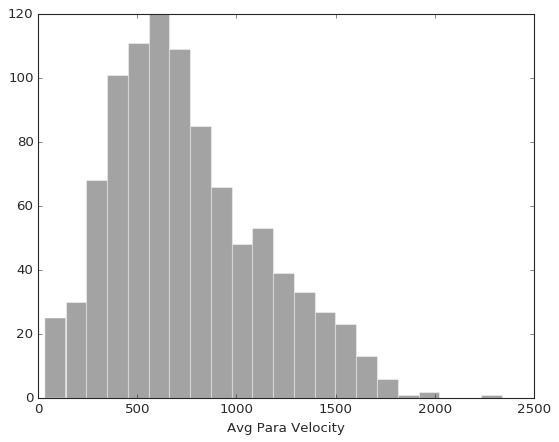

(755.07130585331788, 394.77282333252509)
(237,)
(962,)
682.520063429


In [146]:
# p1, d1 = bdsim_raw.single_hist('"Avg Para Velocity"', '"Strike Or Abort" < 3', husl[0], [200, [0,10]])
# pl.show()

# #d1 = np.abs(d1) 
# #d1 = np.degrees(np.abs(d1))
# print np.mean(d1)
# fig, ax = pl.subplots(1,1)
# sb.distplot(d1, kde=0, ax=ax, bins=100)
# ax.set_xlim([0,10])
# pl.show()


# measured 35 random para lengths in cont.AVI from 090518_2
avg_para_size = .0106 * np.array([11,15,17,14,11,15,14,15,14,15,17,14,16,18,18,17,13,18,11,13,16,13,18,19,15,16,15,17,12,16,16,13,12, 15,14])
print np.mean(avg_para_size)
cpal = sb.color_palette()

# Mean para size is 158 microns


p1, d1 = bdsim_raw.single_hist('"Avg Para Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', husl[0], [100, [0,10]])
pl.show()

fig, ax = pl.subplots(1,1)
d1 = d1 * .0106 / .048 * 1000
sb.distplot(d1, kde=0, color=cpal[6], ax=ax)
ax.set_xlim([0,2500])
pl.show()
nf = norm.fit(d1)
print nf

print d1[d1 > 1000].shape
print d1.shape

print np.median(d1)

fig.savefig('sing_hist.pdf')
#norm.cdf(400, nf[0], nf[1])

# Tank is 20 mm long, and covered by 1888 pixels. .0106 mm / pixel 

# Avg velocity is how many pixels the para moved in 3 frames (48 ms). 
# so you want to take your avg velocity in pixels / 3fr
# multiply by .0106 mm / pixel, mutiply by 1 3fr / .048 ms. 



In [50]:
print normfit
print norm.cdf(.5, .30, .19)

(0.30401572561728391, 0.19615706057480004)
0.853745060908


### PREDICTION CALCULATORS

In [116]:
# ALWAYS USE INVERTED DATA HERE!
spacing = .3
p_angle_bounds = [[i, i+spacing] for i in np.arange(0,1,spacing)]
norm_az = 0
norm_alt = 0
p_angle_bounds_invert = [[-a[1], -a[0]] for a in p_angle_bounds]
print p_angle_bounds_invert
vels = [-5, -.01]
vels = [.01, 5]
use_abs_val = 0
distance_limit = [0, 1000]
#p_angle_bounds = [[0, 1]]
#distance_limit = [0, 200]
actions = [1,2]
#skip_bout_numbers = ['reverse', range(-50, -3) + [-1]]
#skip_bout_numbers = ['forward', range(1, 50) + [-1]]
skip_bout_numbers = ['forward', [-1,0]]

[[-0.29999999999999999, -0.0], [-0.59999999999999998, -0.29999999999999999], [-0.89999999999999991, -0.59999999999999998], [-1.2, -0.89999999999999991]]


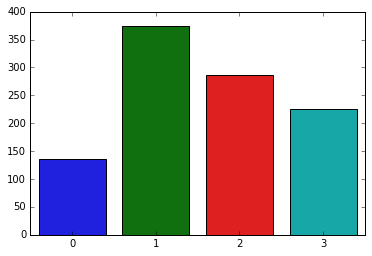

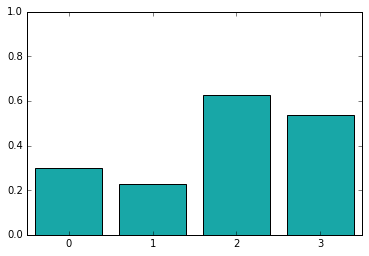

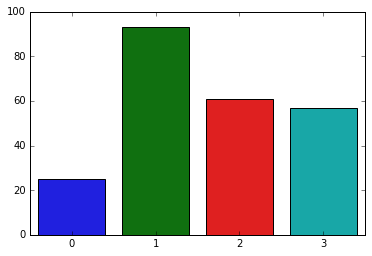

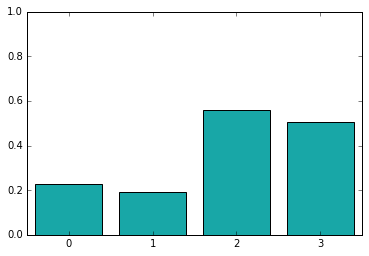

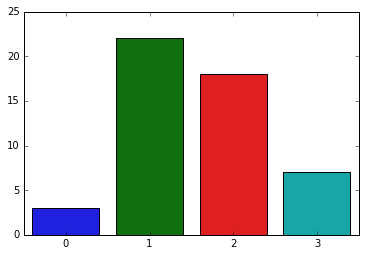

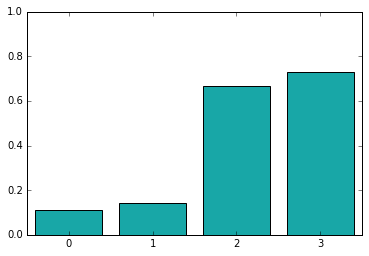

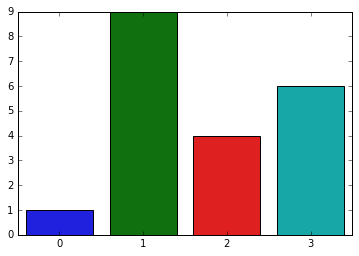

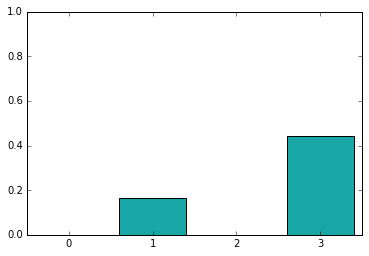

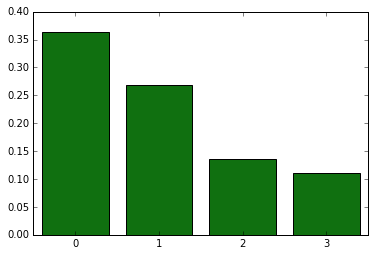

TOTAL BOUTS
[511, 118, 25, 10]


In [117]:
tb, bout_assignment = pred_wrapper(data, p_angle_bounds, 
                                   skip_bout_numbers, actions, distance_limit, use_abs_val, vels, 
                                   norm_az, norm_alt, 'az')

IndexError: list index out of range

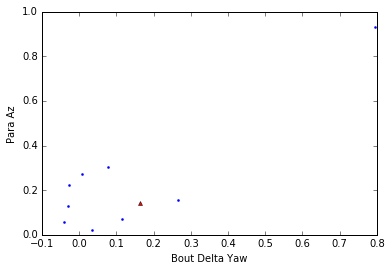

In [118]:
varb = "Bout Delta Yaw"
varb_predict_overshoot = []
varb_predict_undershoot = []

p_angle_bounds = p_angle_bounds[0]
plot_varb1 = "Bout Delta Yaw"
plot_varb2 = "Para Az"

# a bout assignment of 1 is an undershooting lag.
# bout assignment of 2 is an overshooting lag
# bout assignment of 3 is an undershooting lead.
# bout assignment of 4 is an overshooting lead

# dots are lags, triangles are leads
# blue is undershoot, red is overshoot

for ind, p_az in enumerate(data["Para Az"]):
        marker_size = 4
        if bout_assignment[ind] == 0:
            continue
        if bout_assignment[ind] == 1:
            marker_type = '.'
            p_color = 'b'
        if bout_assignment[ind] == 2:
            marker_type = '.'
            p_color = 'r'
        if bout_assignment[ind] == 3:
            marker_type = '^'
            p_color = 'b'
            varb_predict_undershoot.append(data[varb][ind])
        if bout_assignment[ind] == 4:
            marker_type = '^'
            p_color = 'r'
            varb_predict_overshoot.append(data[varb][ind])
        pl.plot(data[plot_varb1][ind], data[plot_varb2][ind], color=p_color,
            marker=marker_type, ms=marker_size, linestyle='None')
        pl.xlabel(plot_varb1)
        pl.ylabel(plot_varb2)
pl.savefig('circle_triangle_plot.pdf')
pl.figure()
sb.distplot(varb_predict_overshoot, fit_kws={"color":"blue"}, fit=norm, kde=False,color='b')
sb.distplot(varb_predict_undershoot, fit_kws={"color":"yellow"}, fit=norm, kde=False,color='y')


pl.savefig('prediction_tally.pdf')

# RED CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING RIGHT
# BLUE CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING LEFT
# RED SQUARES ARE A SUCCESSFUL LEAD WHEN PARA IS GOING RIGHT
# BLUE TRIANGLES ARE SUCCESSFUL LEADS WHEN PARA IS GOING LEFT
# RED CIRCLES ACCOUNT FOR NOT SEEING A CHANGE IN BOUT AZ AND YAW IN THIS WINDOW! 

In [ ]:
pred_velocities = []
for loc, i in enumerate(bout_assignment):
    if i != 0:
        pred_velocities.append(data["Para Az Velocity"][loc])
pl.hist(3*np.degrees(pred_velocities), bins=20)

        
        

#         print('Pred Bout Assignment: ' + str(bout_assignment[loc]))
#         a = raw_input('')

In [ ]:
print np.degrees(np.mean(np.abs(data["Para Az Velocity"])))
#print np.degrees(np.mean(np.abs(nac_data["Para Az Velocity"])))

(6698,)
(6698,)


[-3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,